#Minimum Spanning Trees

In [5]:
%matplotlib inline
import networkx as nx
import numpy as np
from matplotlib import pyplot as plt

###Application: Tracking Microevolution

DNA is a sequence of four nucleotide bases that codes for all of the proteins and enzymes that living cells produce.
Mutations are changes in the DNA sequence that occur as DNA is damaged or incorrectly copied.
This change in base sequence changes which RNA, proteins, and enzymes are produced, leading to changes in physical attributes.
This process of mutating and changing is why bacteria become resistant to antibiotics and why we need a new flu vaccine every year.

When studying diseases, understanding how the bacteria's or virus' phylogeny, or evolutionary history, can help determine how the disease has spread and why it affects people differently.
One tool for this is a minimum spanning tree (MST).
MSTs can show which bacteria strains are more similar to each other and what bacteria might be common ancestors.
Often, MSTs are starting points for more complex and accurate algorithms.

In this notebook we will demonstrate this application of MSTs by creating a phylogeny of Streptococcus pneumoniae based on the aroE gene.
S.pneumoniae resides in the nasopharynx of healthy carriers, but when it spreads to other parts of the body it causes pneumonia, bronchitis, meningitis, and other diseases.
The aroE gene creates an enzyme which helps synthesize aromatic amino acids.
You can download the data from http://pubmlst.org/perl/bigsdb/bigsdb.pl?db=pubmlst_spneumoniae_seqdef&page=downloadAlleles.

First, we read in the data and store it in an array where each row is a sample and each column is a nucleotide base.
We have 323 samples, and each sample is 405 base pairs long.

In [6]:
num_samples = 323
bp_length = 405
aroE = np.empty((num_samples,bp_length),dtype=np.str_)
counter = -1
bp=0
with open('aroE.fas', 'r') as f:
    for line in f:
        l = line.split()
        if l[0][0] == '>':
            counter += 1
            bp=0
            continue
        for i in xrange(len(l[0])):
            aroE[counter,bp+i] = l[0][i]
        bp += len(l[0])
print aroE

[['G' 'A' 'A' ..., 'T' 'G' 'T']
 ['G' 'A' 'A' ..., 'T' 'G' 'T']
 ['G' 'A' 'A' ..., 'T' 'G' 'T']
 ..., 
 ['G' 'A' 'A' ..., 'T' 'G' 'T']
 ['G' 'A' 'A' ..., 'T' 'G' 'T']
 ['G' 'A' 'A' ..., 'T' 'G' 'T']]


Next, we create a graph of our data.
Each node is a sample and is connected to every other node by an edge with weight equal to the number of base pair differences.
For example, the edge between the sequences 'AGTCGC' and 'AGTTGC' would have a weight of 1 because there is one nucelotide difference.

In [7]:
bacteria = nx.Graph()
for i in xrange(num_samples):
    for j in xrange(num_samples):
        bacteria.add_edge(i,j,weight=np.sum(aroE[i]!=aroE[j]))

Last, we create a minimum spanning tree and graph our results.

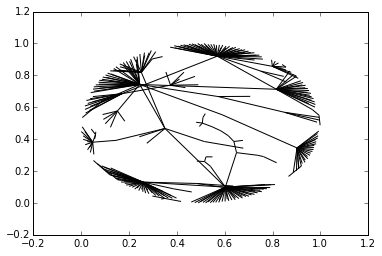

In [8]:
MST = nx.minimum_spanning_tree(bacteria)
pos = nx.spring_layout(MST)
nx.draw_networkx_edges(MST,pos)


Clusters of nodes show bacterial strains that are similar in DNA composition.
Similarly, clusters that are connected by shorter edges are more similar.
Using this analysis combined with geographical or temporal data can help track the spread of a disease. 
This technique was used to track the 2014 Ebola outbreak, compare the virus with past outbreaks, and determine that each outbreak came from the natural resevoir rather than the previous outbreak. [](#cite-ebola)

<!--bibtex

@article{ebola,
    author = {Gire, Stephen K. and Goba, Augustine and Andersen, Kristian G. and Sealfon, Rachel S. G. and Park, Daniel J. and Kanneh, Lansana and Jalloh, Simbirie and Momoh, Mambu and Fullah, Mohamed and Dudas, Gytis and Wohl, Shirlee and Moses, Lina M. and Yozwiak, Nathan L. and Winnicki, Sarah and Matranga, Christian B. and Malboeuf, Christine M. and Qu, James and Gladden, Adrianne D. and Schaffner, Stephen F. and Yang, Xiao and Jiang, Pan-Pan and Nekoui, Mahan and Colubri, Andres and Coomber, Moinya Ruth and Fonnie, Mbalu and Moigboi, Alex and Gbakie, Michael and Kamara, Fatima K. and Tucker, Veronica and Konuwa, Edwin and Saffa, Sidiki and Sellu, Josephine and Jalloh, Abdul Azziz and Kovoma, Alice and Koninga, James and Mustapha, Ibrahim and Kargbo, Kandeh and Foday, Momoh and Yillah, Mohamed and Kanneh, Franklyn and Robert, Willie and Massally, James L. B. and Chapman, Sinéad B. and Bochicchio, James and Murphy, Cheryl and Nusbaum, Chad and Young, Sarah and Birren, Bruce W. and Grant, Donald S. and Scheiffelin, John S. and Lander, Eric S. and Happi, Christian and Gevao, Sahr M. and Gnirke, Andreas and Rambaut, Andrew and Garry, Robert F. and Khan, S. Humarr and Sabeti, Pardis C.}, 
    title = {Genomic surveillance elucidates Ebola virus origin and transmission during the 2014 outbreak},
    volume = {345}, 
    number = {6202}, 
    pages = {1369-1372}, 
    year = {2014}, 
    doi = {10.1126/science.1259657}, 
    abstract ={In its largest outbreak, Ebola virus disease is spreading through Guinea, Liberia, Sierra Leone, and Nigeria. We sequenced 99 Ebola virus genomes from 78 patients in Sierra Leone to ~2000× coverage. We observed a rapid accumulation of interhost and intrahost genetic variation, allowing us to characterize patterns of viral transmission over the initial weeks of the epidemic. This West African variant likely diverged from central African lineages around 2004, crossed from Guinea to Sierra Leone in May 2014, and has exhibited sustained human-to-human transmission subsequently, with no evidence of additional zoonotic sources. Because many of the mutations alter protein sequences and other biologically meaningful targets, they should be monitored for impact on diagnostics, vaccines, and therapies critical to outbreak response.}, 
    URL = {http://www.sciencemag.org/content/345/6202/1369.abstract}, 
    eprint = {http://www.sciencemag.org/content/345/6202/1369.full.pdf}, 
    journal = {Science} 
}

-->